In [ ]:
# import the library ..

from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
import statsmodels.api as sm


%config InlineBackend.figure_format = 'retina'
%matplotlib inline

plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 30)
pd.set_option('display.max_rows', 2000)
from datetime import datetime
from fbprophet import Prophet
from sklearn.metrics import r2_score
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.stattools import adfuller

In [ ]:
#Load dataset
df = pd.read_csv('final_con.csv',index_col='Date')
df.index.freq = 'MS'

In [ ]:
df.columns

In [8]:
df1=df[['Weekly U.S. All Grades All Formulations Retail Gasoline Prices  (Dollars per Gallon)']]

In [41]:
df1=df1[df1.index > '2015-01-01']
df1.head()

,Weekly U.S. All Grades All Formulations Retail Gasoline Prices (Dollars per Gallon)
Date,
2015-02-01,2.401250
2015-03-01,2.544000
2015-04-01,2.573333
2015-05-01,2.814400
2015-06-01,2.890250


# checking for gasoline price:

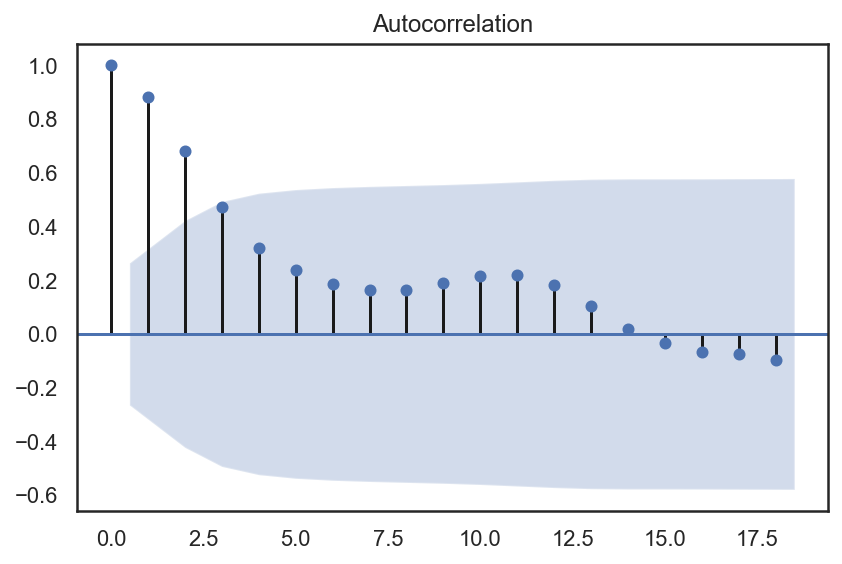

In [42]:
# plot the autocorrelation .
sns.set(style="white")
plot_acf(df1);

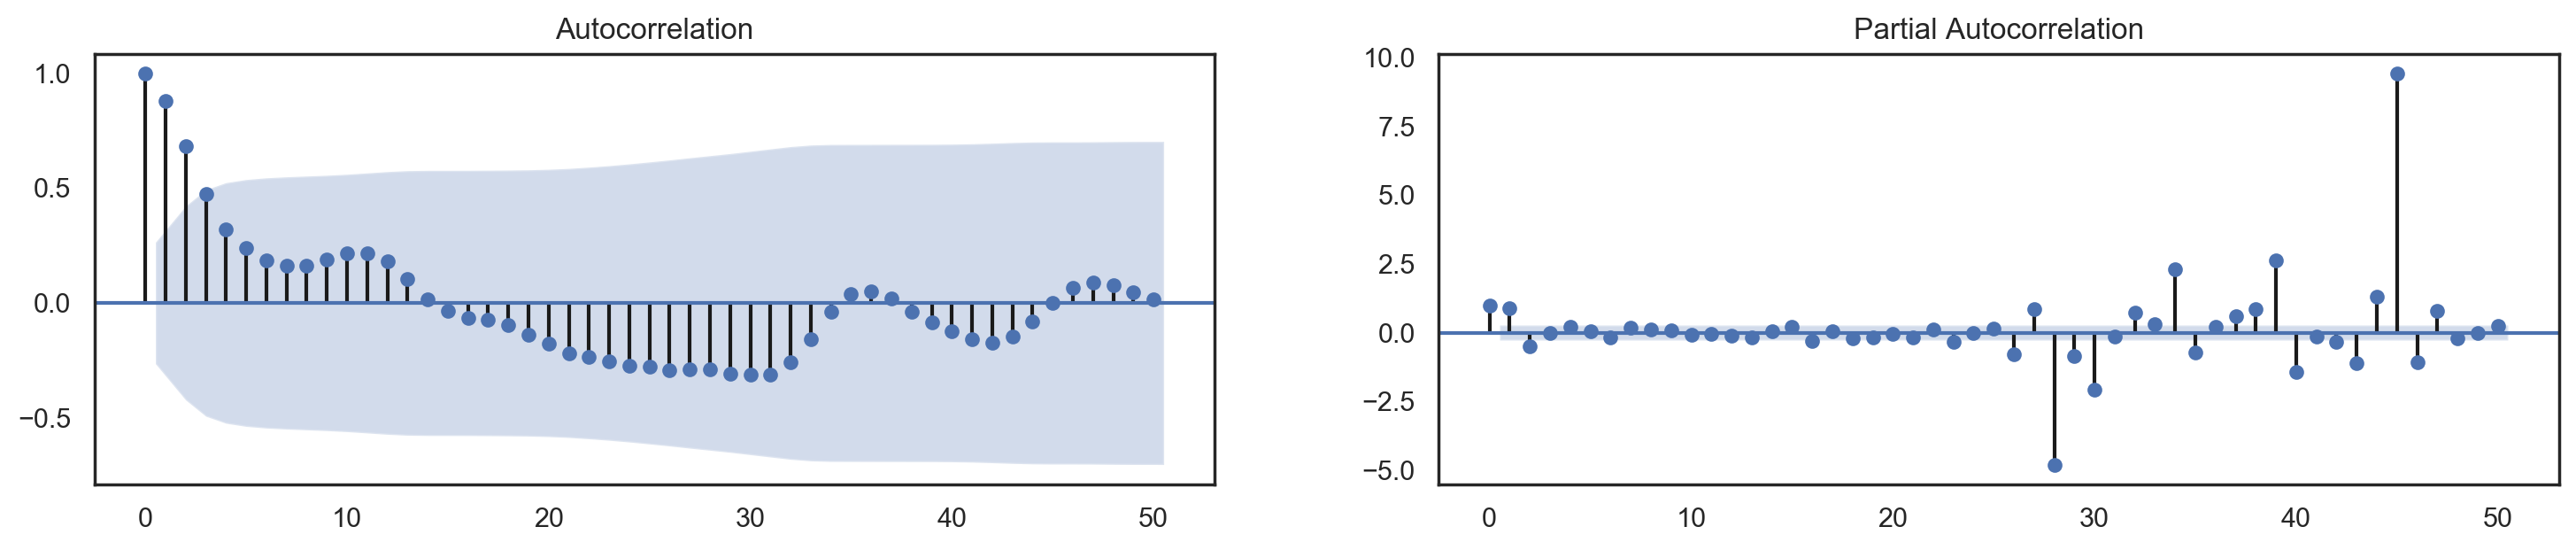

In [56]:
# Draw Plot
fig, axes = plt.subplots(1,2,figsize=(16,3), dpi= 100)
plot_acf(df1.values.tolist(), lags=50, ax=axes[0]);
plot_pacf(df1.values.tolist(), lags=50, ax=axes[1]);

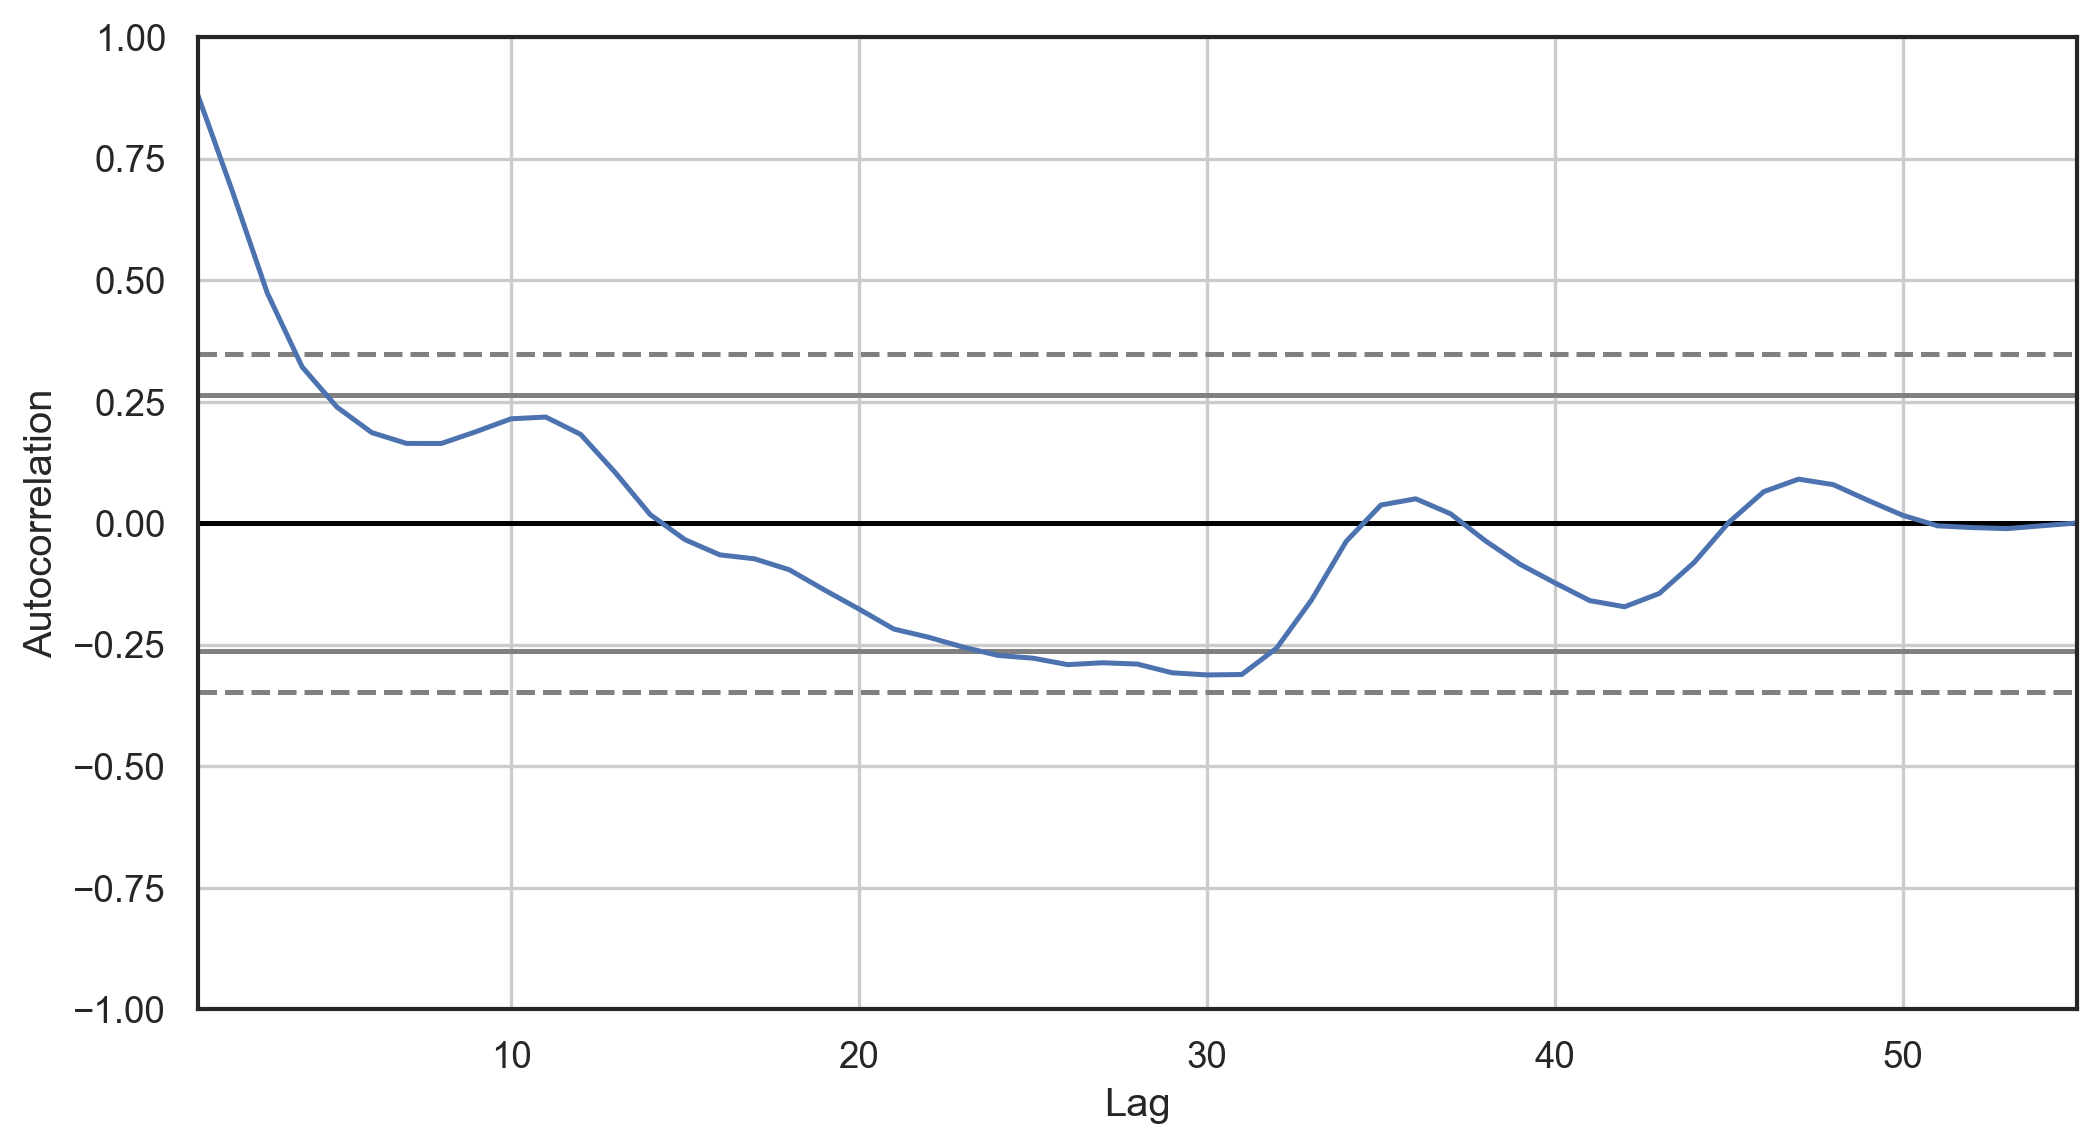

In [44]:
# Draw Plot
plt.rcParams.update({'figure.figsize':(9,5), 'figure.dpi':120})
autocorrelation_plot(df1.values.tolist())

In [45]:
title ='average of Weekly U.S. All Grades All Formulations Retail Gasoline Prices  (Dollars per Gallon)'

In [50]:
def adf_test(series):

    print(f'Augmented Dickey-Fuller Test: {title}')
    result = adfuller(series.dropna(),autolag='AIC') # .dropna() handles differenced data
    
    labels = ['ADF test statistic','p-value','# lags used','# observations']
    out = pd.Series(result[0:4],index=labels)

    for key,val in result[4].items():
        out[f'critical value ({key})']=val
        
    print(out.to_string()) # .to_string() removes the line "dtype: float64"
    
    if result[1] <= 0.05:
        print("Reject the null hypothesis")
        print("Data is stationary")
    else:
        print("Fail to reject the null hypothesis")
        print("Data is non-stationary")

#### Test for stationarity: If the test statistic is less than the critical value, we can reject the null hypothesis (aka the series is stationary). When the test statistic is greater than the critical value, we fail to reject the null hypothesis (which means the series is not stationary).


### The test statistic > critical value, which implies that the series is not stationary. This confirms our original observation which we initially saw in the visual test.

In [47]:
adf_test(df1['Weekly U.S. All Grades All Formulations Retail Gasoline Prices  (Dollars per Gallon)'])

Augmented Dickey-Fuller Test: average of Weekly U.S. All Grades All Formulations Retail Gasoline Prices  (Dollars per Gallon)
ADF test statistic      -2.727362
p-value                  0.069422
# lags used              1.000000
# observations          53.000000
critical value (1%)     -3.560242
critical value (5%)     -2.917850
critical value (10%)    -2.596796
Fail to reject the null hypothesis
Data is non-stationary


In [48]:
#define function for kpss test
from statsmodels.tsa.stattools import kpss
#define KPSS
def kpss_test(timeseries):
    print ('Results of KPSS Test:')
    kpsstest= kpss(timeseries, regression='c')
    kpss_output= pd.Series(kpsstest[0:3], index=['Test Statistic','p-value','Lags Used'])
    for key,value in kpsstest[3].items():
        kpss_output['Critical Value (%s)'%key] = value
    print (kpss_output)

#### 2 . KPSS (Kwiatkowski-Phillips-Schmidt-Shin) Test
KPSS is another test for checking the stationarity of a time series (slightly less popular than the Dickey Fuller test). The null and alternate hypothesis for the KPSS test are opposite that of the ADF test, which often creates confusion.


The authors of the KPSS test have defined the null hypothesis as the process is trend stationary, to an alternate hypothesis of a unit root series. We will understand the trend stationarity in detail in the next section. For now, let’s focus on the implementation and see the results of the KPSS test.


## Null Hypothesis: The process is trend stationary.
## Alternate Hypothesis: The series has a unit root (series is not stationary).

In [49]:
kpss_test(df1['Weekly U.S. All Grades All Formulations Retail Gasoline Prices  (Dollars per Gallon)'])

Results of KPSS Test:
Test Statistic            0.323962
p-value                   0.100000
Lags Used                11.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64


# checking for gasoline Consumption :

In [37]:
df2=df[['Motor Gasoline Consumed by the Transportation Sector(T/ B per Day)']]

In [38]:
df2=df2[df2.index > '2015-01-01']
df2.head()

,Motor Gasoline Consumed by the Transportation Sector(T/ B per Day)
Date,
2015-02-01,8498.257
2015-03-01,8717.704
2015-04-01,8845.658
2015-05-01,8915.920
2015-06-01,9064.745


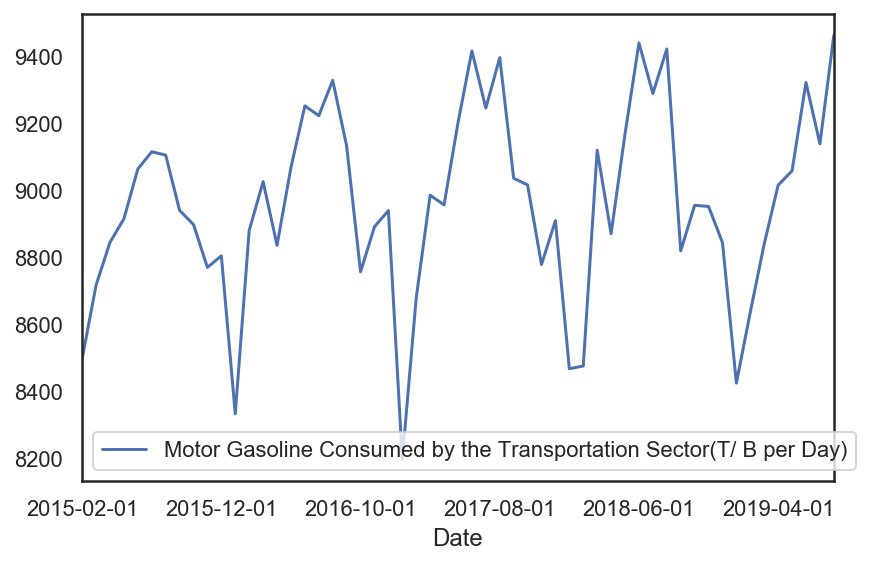

In [39]:
sns.set(style="white")
df2.plot()

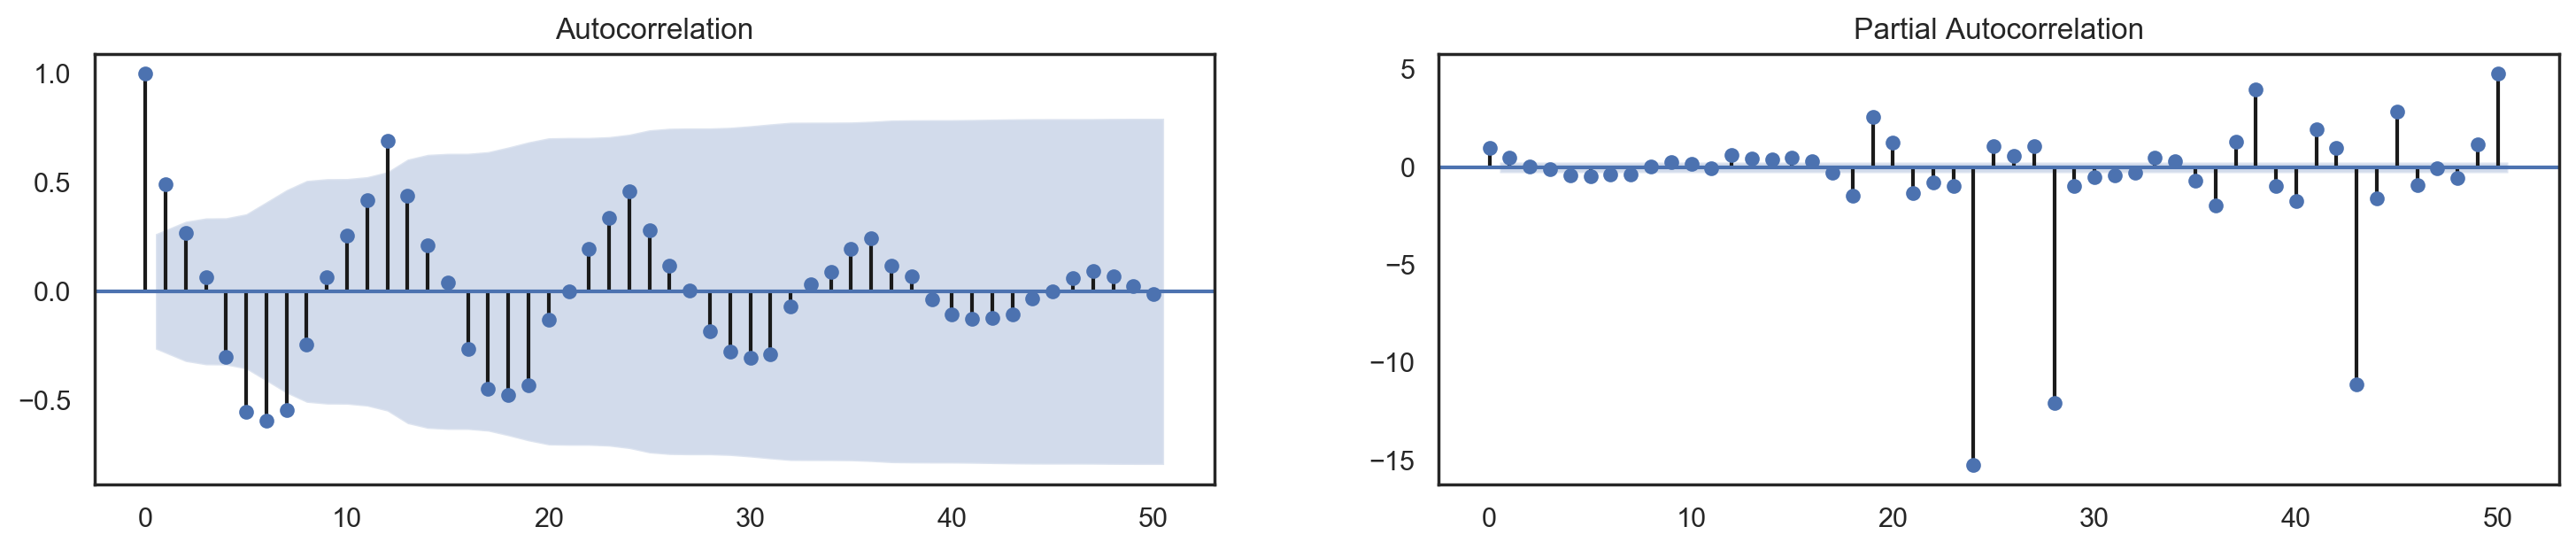

In [54]:
# Draw Plot
fig, axes = plt.subplots(1,2,figsize=(16,3), dpi= 100)
plot_acf(df2.values.tolist(), lags=50, ax=axes[0]);
plot_pacf(df2.values.tolist(), lags=50, ax=axes[1]);

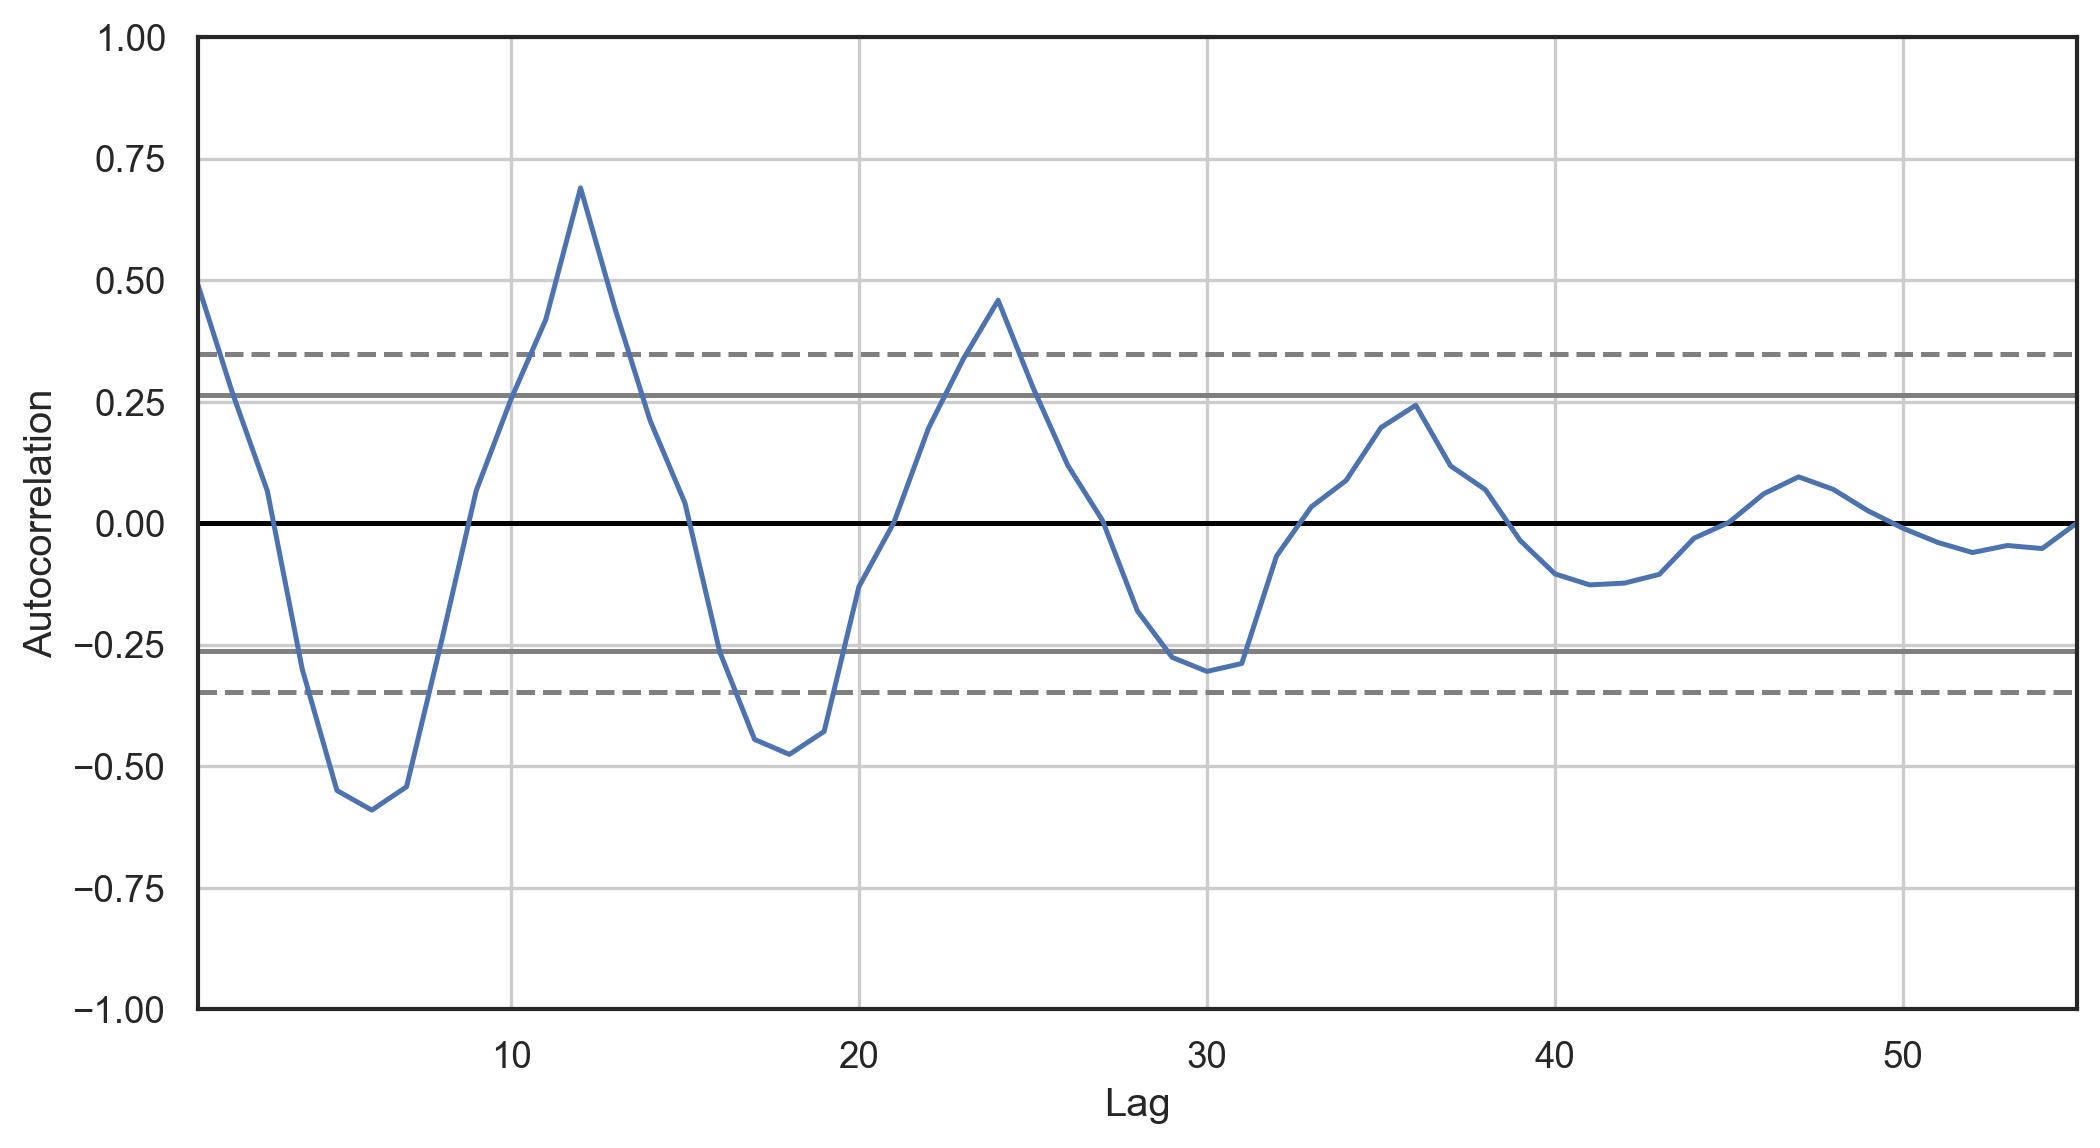

In [55]:
# Draw Plot
plt.rcParams.update({'figure.figsize':(9,5), 'figure.dpi':120})
autocorrelation_plot(df2.values.tolist())

In [51]:
title ='Motor Gasoline Consumed by the Transportation Sector(T/ B per Day)'

In [52]:
#adfuller test
adf_test(df2['Motor Gasoline Consumed by the Transportation Sector(T/ B per Day)'])

Augmented Dickey-Fuller Test: Motor Gasoline Consumed by the Transportation Sector(T/ B per Day)
ADF test statistic      -3.937082
p-value                  0.001778
# lags used             11.000000
# observations          43.000000
critical value (1%)     -3.592504
critical value (5%)     -2.931550
critical value (10%)    -2.604066
Reject the null hypothesis
Data is stationary


In [53]:
#kpss test
kpss_test(df2['Motor Gasoline Consumed by the Transportation Sector(T/ B per Day)'])

Results of KPSS Test:
Test Statistic            0.592170
p-value                   0.023348
Lags Used                11.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64
